In [1]:
import compute_score_test

Score for ['1S', '2M', '3L', '2M', '1S'] is 0.000115


In [2]:
from compute_score_test import *

`Forward Pass`

In [3]:
# Foward Pass.

hmc_fp = HiddenMarkovChain_FP(A, B, pi)
observations = ['1S', '2M', '3L', '2M', '1S']
print("Score for {} is {:f}".format(observations, hmc_fp.score(observations)))

Score for ['1S', '2M', '3L', '2M', '1S'] is 0.000000


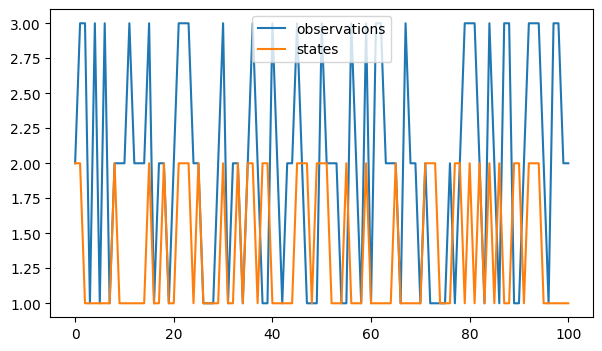

In [4]:
hmc_s = HiddenMarkovChain_Simulation(A, B, pi)
observation_hist, states_hist = hmc_s.run(100)  # length = 100
stats = pd.DataFrame({
    'observations': observation_hist,
    'states': states_hist}).applymap(lambda x: int(x[0])).plot(figsize=(7,4))

* counting the number of Occurences of Each state and Divide it by the number of elements in our sequence, we get closer and closer to these numbers (occcurences) as the sequence length grows

In [8]:
hmc_s = HiddenMarkovChain_Simulation(A,B,pi)

stats = {}

for length in np.logspace(1,5,40).astype(int):
    observation_hist, states_hist = hmc_s.run(length)
    stats[length] = pd.DataFrame({
        'observations': observation_hist,
        'states' : states_hist
    }).applymap(lambda x: int(x[0]))

In [9]:
S = np.array(list(map(lambda x: x['states'].value_counts().to_numpy() / len(x), stats.values())))

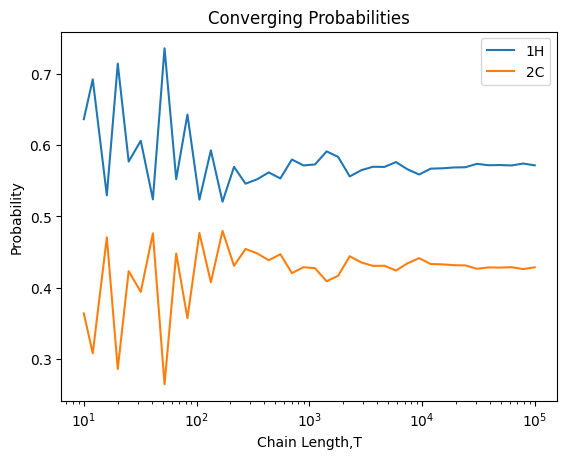

In [18]:
plt.semilogx(np.logspace(1,5,40).astype(int), S)
plt.xlabel('Chain Length,T')
plt.ylabel('Probability')
plt.title('Converging Probabilities')
plt.legend(['1H', '2C'])
plt.show()